<a href="https://colab.research.google.com/github/i40-Tools/I40KG-Embeddings/blob/master/Community-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I40 standards landscape similarity analysis using embeddings

## Overview

In this notebook, we show the similarity analysis between Industry 4.0 Standards. 
To do so, we create embeddings about the Industry 4.0 Standards Knowledge Graph (I40KG) developed by [Grangel-Gonzales et. al.](https://www.researchgate.net/publication/318208930_The_Industry_40_Standards_Landscape_from_a_Semantic_Integration_Perspective)

The embeddings are located here: [I40 Embeddings](https://github.com/i40-Tools/I40KG-Embeddings/tree/master/logs_sto)

In [434]:
import scipy
import numpy as np
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity

### In this section we show the analysis of similarity among standards belonging to the same framework

In [637]:
import json
from rdflib import Graph
SIMETRIC_MATRIX_FILE = "simetric_matrix.tsv"
ENTITIES_FILE = "entities.txt"
list_sim = []
output='result/TransR/'

g = Graph()
g.parse("sto/sto-enriched.nt", format="nt")
    
len(g) # prints 2
    
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select ?s where {
            ?s rdf:type sto:Standard .
    } limit 1000""")

      
#with open("embeddings/TransE/entities_to_embeddings.json",'rb') as f:
#with open("sto/relatedTo/embeddings/TransR/entities_to_embeddings.json",'rb') as f:
with open("sto/hasClassification/embeddings/TransR/entities_to_embeddings.json",'rb') as f:
    array = json.load(f)
new_dict = {}
for row in qres:
    for key,value in array.items():
        if key == "%s" % row:
            tem = key
            #print(key)
            new_dict[tem] = array[key]


with open('output_standard_same_framework.json','w') as f:
    # this would place the entire output on one line
    # use json.dump(lista_items, f, indent=4) to "pretty-print" with four spaces per indent
    json.dump(new_dict, f) 

    
#to read the file containing standards/frameworks along with their embeddings   
with open('output_standard_same_framework.json', 'r') as f:
    array = json.load(f)

### Create standard/framework list

In [638]:
list_n = [*array]
entities = "\n".join(str(x) for x in list_n)
n_ent = str(len(list_n))
entity = open(output+'semep/'+ENTITIES_FILE, mode="w+")
entity.write(n_ent+"\n"+entities)
entity.close()
print(len([*array]))

322


### Compare each standard/framework with all the other standards/frameworks to build cosine similarity matrix

In [639]:
result = {}
s=n_ent+"\n"
cosine_matrix = pd.DataFrame(index=list(array.keys()), columns=list(array.keys()))
cosine_matrix = cosine_matrix.fillna(0.0)
for key,value in array.items():
    for keyC,valueC in array.items():
        sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
        sim = round(sim, 5)
        list_sim.append(sim)
        cosine_matrix.at[key, keyC] = sim

threshold = np.percentile(list_sim, 90)
print("percentil", threshold)
for col in cosine_matrix.columns:
    cosine_matrix.loc[cosine_matrix[col] < threshold, [col]] = 0
cosine_matrix.head()

percentil 0.23791


,https://w3id.org/i40/sto#IEC_61970_P301_E6_RLV,https://w3id.org/i40/sto#IEC_62424,https://w3id.org/i40/sto#IEC_61850_P7_S4_E2,https://w3id.org/i40/sto#IEC_29115,https://w3id.org/i40/sto#ETSI_ULE,https://w3id.org/i40/sto#IEC_61850_P4_E1,https://w3id.org/i40/sto#IEC_60870_P5_S102_E1,https://w3id.org/i40/sto#IEC_61968_P3_E2,https://w3id.org/i40/sto#IEC_61968_P4_E1,https://w3id.org/i40/sto#ISO_5459,...,https://w3id.org/i40/sto#IEC_29182_P1,https://w3id.org/i40/sto#ISO_27001,https://w3id.org/i40/sto#DIN_EN_ISO_13849,https://w3id.org/i40/sto#ISO_18828-2,https://w3id.org/i40/sto#IEC_60946_E1,https://w3id.org/i40/sto#IEC_62794,https://w3id.org/i40/sto#IEC_60381_P2_E1,https://w3id.org/i40/sto#ISO_42010,https://w3id.org/i40/sto#IEC_61850_P7_S2_E2,https://w3id.org/i40/sto#IEC_61968_P3_E1
https://w3id.org/i40/sto#IEC_61970_P301_E6_RLV,1.0,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.0,0.00000,...,0.0,0.00000,0.30055,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#IEC_62424,0.0,1.0,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.0,0.00000,...,0.0,0.24472,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#IEC_61850_P7_S4_E2,0.0,0.0,1.00000,0.25347,0.0,0.00000,0.41365,0.00000,0.0,0.00000,...,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#IEC_29115,0.0,0.0,0.25347,1.00000,0.0,0.00000,0.00000,0.26996,0.0,0.27579,...,0.0,0.30393,0.31277,0.24011,0.32659,0.0,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#ETSI_ULE,0.0,0.0,0.00000,0.00000,1.0,0.24547,0.00000,0.00000,0.0,0.00000,...,0.0,0.26033,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0


In [640]:
cosine_matrix.shape

(322, 322)

### Save cosine similarity matrix with the structure SemEP need

In [641]:
f = open(output+'semep/'+'matrix_undirected_cosine.tsv', mode="w+")
f.write(str(cosine_matrix.shape[0])+"\n")
f.close()
cosine_matrix.to_csv(output+'semep/'+'matrix_undirected_cosine.tsv', mode='a', sep=' ',
                     index=False, header=False, float_format='%.5f')

In [ ]:
# Run SemEP from Doker (https://hub.docker.com/r/kemele/semepnode) OR (https://github.com/SDM-TIB/SemEP-Node)
#!sudo docker run -it --rm -v /media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/I40KG-Embeddings/result/TransD/semep:/data kemele/semepnode:23-05-2018 semEP-node entities.txt matrix_undirected_cosine.tsv 0.20612

In [642]:
num_cls = 8

### METIS Undirected MAX based similarity graph file

In [643]:
metislines = []
nodes = {"name":[], "id":[]}
kv = 1
edges = 0
for i, row in cosine_matrix.iterrows():
    val = ""
    ix = 1
    ledges = 0
    found = False
    for k in row.keys():
        if i != k and row[k] > 0:
            val += str(ix) + " " + str(int(row[k] * 100000)) + " "
            # Only one edge is counted between two nodes, i.e., (u,v) and (v, u) edges are counted as one
            # Self links are also ignored, Notive ix>kv
            #if ix > kv:
            ledges += 1
            found = True
        ix += 1
    if found:
        # This node is connected
        metislines.append(val.strip())
        edges += ledges
        nodes["name"].append(i)
        nodes['id'].append(str(kv))
    else:
        # disconnected RDF-MTs are given 10^6 value as similarity value
        metislines.append(str(kv) + " 100000")
        edges += 1
        #---------
        nodes["name"].append(i)
        nodes['id'].append(str(kv))
        print(i)
        print(str(kv))
    
    kv += 1    
nodes = pd.DataFrame(nodes)
print(edges)
nodes.head()

10048


,name,id
0,https://w3id.org/i40/sto#IEC_61970_P301_E6_RLV,1
1,https://w3id.org/i40/sto#IEC_62424,2
2,https://w3id.org/i40/sto#IEC_61850_P7_S4_E2,3
3,https://w3id.org/i40/sto#IEC_29115,4
4,https://w3id.org/i40/sto#ETSI_ULE,5


In [644]:
numedges = edges//2
numedges

5024

### Save filemetis.graph to execute METIS algorithm

In [645]:
#!mkdir result/metis
ff = open(output+'metis/metis.graph', 'w+')
ff.write(str(cosine_matrix.shape[0])+" "+ str(numedges) + " 001\n")
met = [m.strip() + "\n" for m in metislines]
ff.writelines(met)
ff.close()

In [14]:
#nodes.to_csv(output+'metis/METIS_NODE-CODES.tsv', sep='\t', index=False)

In [ ]:
#Run METIS from Doker: https://hub.docker.com/r/kemele/metis
#!sudo docker run -it --rm -v /media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/I40KG-Embeddings/result/TransD/metis:/data kemele/metis:5.1.0 gpmetis metis.graph 2

### Read results standards of 10 Partitions by METIS algorithm

In [646]:
parts = open(output+'metis/metis.graph.part.'+str(num_cls)).readlines()
parts = [p.strip() for p in parts]
print(parts)
len(parts)

['2', '5', '6', '1', '7', '5', '7', '1', '4', '5', '2', '1', '0', '2', '7', '6', '1', '5', '4', '7', '0', '5', '6', '1', '0', '2', '3', '6', '0', '0', '5', '2', '4', '1', '4', '2', '4', '2', '6', '3', '3', '3', '5', '0', '4', '5', '2', '7', '7', '4', '5', '0', '4', '4', '7', '7', '6', '6', '4', '1', '3', '0', '0', '6', '7', '7', '1', '4', '0', '5', '0', '6', '0', '1', '4', '4', '2', '0', '6', '5', '2', '6', '1', '6', '0', '0', '5', '0', '1', '3', '5', '6', '3', '1', '0', '1', '0', '2', '3', '2', '2', '1', '7', '0', '6', '4', '6', '0', '7', '6', '0', '6', '4', '5', '2', '1', '4', '3', '6', '2', '0', '6', '3', '0', '6', '7', '5', '5', '0', '5', '7', '4', '3', '3', '1', '4', '2', '7', '7', '5', '0', '7', '7', '5', '1', '3', '3', '6', '4', '4', '3', '4', '3', '0', '1', '1', '1', '2', '3', '1', '2', '7', '5', '0', '2', '2', '0', '7', '3', '7', '3', '6', '4', '2', '2', '3', '5', '2', '7', '1', '3', '2', '3', '4', '0', '4', '3', '2', '7', '0', '7', '4', '0', '5', '5', '7', '5', '4', '1', '1',

322

### Save each partition standads into a file

In [647]:
i = 0
#partitions = {"0":[], "1":[], "2":[], "3":[], "4":[], "5":[], "6":[], "7":[], "8":[], "9":[], "10":[], "11":[], "12":[], "13":[], "14":[], "15":[], "16":[], "17":[]}
partitions = dict((str(k), []) for k in range(num_cls))
for p in parts:
    name = nodes.iat[i, 0]
    i +=1
    partitions[str(p)].append(name)
    
#f = open(output+'metis/metis_10_standards.graph.json', "w+")
#json.dump(partitions, f)
#f.close()
partitions

{'0': ['https://w3id.org/i40/sto#DIN_77005_P1',
  'https://w3id.org/i40/sto#IEC_60870_P5_S4_E1',
  'https://w3id.org/i40/sto#IEC_61850_P7_S4_E1',
  'https://w3id.org/i40/sto#IEC_15459',
  'https://w3id.org/i40/sto#IEC_42010',
  'https://w3id.org/i40/sto#IEC_60382',
  'https://w3id.org/i40/sto#IEC_29190',
  'https://w3id.org/i40/sto#ISO_14739-1',
  'https://w3id.org/i40/sto#ISO_19440',
  'https://w3id.org/i40/sto#IEC_62264_P6',
  'https://w3id.org/i40/sto#IEEE_1905_1-2013',
  'https://w3id.org/i40/sto#VDMA_24582',
  'https://w3id.org/i40/sto#IEC_61512',
  'https://w3id.org/i40/sto#B2MML',
  'https://w3id.org/i40/sto#ISO_11783',
  'https://w3id.org/i40/sto#IEC_62591',
  'https://w3id.org/i40/sto#IEC_61511',
  'https://w3id.org/i40/sto#ISA-95',
  'https://w3id.org/i40/sto#IEC_61334',
  'https://w3id.org/i40/sto#IEC_61334_P4_S32_E1',
  'https://w3id.org/i40/sto#IEC_62279',
  'https://w3id.org/i40/sto#ebXML',
  'https://w3id.org/i40/sto#IEC_61400_P25_S1_E2',
  'https://w3id.org/i40/sto#IEC_

In [648]:
i = 0
count = 0
#!mkdir result/metis/clusters
for p in partitions:
    if len(partitions[p]) == 0:
        continue
    count += len(partitions[p])
    f = open(output+'metis/clusters/cluster-' + str(i) + '.txt', 'w+')
    [f.write(l+'\n') for l in partitions[p]]
    f.close()
    i+=1
print(count)

322


## K-means Analyse 

In [649]:
vectors = []
for key,value in array.items():
    vectors.append(value)
X = np.array(vectors)

In [650]:
X[0]

array([-0.15448715, -0.14600676,  0.00819708,  0.15345043, -0.07948818,
       -0.18829593,  0.15285093,  0.06422064,  0.1021127 , -0.00262903,
       -0.11958659, -0.09999864,  0.1821976 ,  0.0927913 ,  0.03955243,
       -0.13866557,  0.10316595,  0.01430139,  0.16276784,  0.14984177,
        0.1874889 , -0.1660741 , -0.00350543, -0.04136196, -0.054141  ,
        0.14491259, -0.04939926, -0.11672612, -0.01645335, -0.0047361 ,
        0.069475  , -0.03449323, -0.12879312,  0.08247276, -0.10258504,
       -0.11660773, -0.12046773,  0.17116767, -0.00591136, -0.05097289,
       -0.11188428,  0.2132739 ,  0.10623147, -0.02083748, -0.1475423 ,
       -0.08066843, -0.13318338, -0.13764754,  0.00789608,  0.13791409])

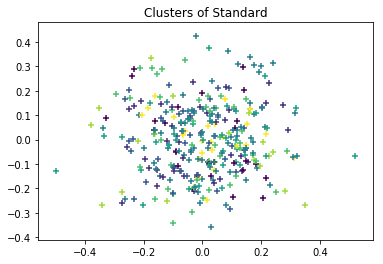

In [651]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(X)
pca_c = pca.transform(X)
#kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans = KMeans(n_clusters=num_cls, random_state=0).fit(cosine_matrix)

plt.scatter(pca_c[:, 0], pca_c[:, 1], c=kmeans.labels_, marker='+')
plt.title("Clusters of Standard")

plt.show()

### Number of standard by clsuter

In [652]:
pd.value_counts(kmeans.labels_, 0)

0    25
1    44
2    41
3    82
4    40
5    46
6    18
7    26
dtype: int64

### Save each partition standads into a file

In [653]:
list_cluster = pd.DataFrame()
list_cluster.insert(0, 'standards', list_n)
list_cluster.insert(1, 'clusters', kmeans.labels_)
#list_cluster = list_cluster.sort_values(by=['clusters'], ascending=False)

In [654]:
list_cluster.head()

,standards,clusters
0,https://w3id.org/i40/sto#IEC_61970_P301_E6_RLV,4
1,https://w3id.org/i40/sto#IEC_62424,5
2,https://w3id.org/i40/sto#IEC_61850_P7_S4_E2,1
3,https://w3id.org/i40/sto#IEC_29115,5
4,https://w3id.org/i40/sto#ETSI_ULE,1


In [655]:
#!mkdir result/Kmeans
#!mkdir result/Kmeans/cluster
cls_0 = list_cluster.loc[list_cluster['clusters'] == 0]
cls_1 = list_cluster.loc[list_cluster['clusters'] == 1]

cls_2 = list_cluster.loc[list_cluster['clusters'] == 2]
cls_3 = list_cluster.loc[list_cluster['clusters'] == 3]
cls_4 = list_cluster.loc[list_cluster['clusters'] == 4]
cls_5 = list_cluster.loc[list_cluster['clusters'] == 5]
cls_6 = list_cluster.loc[list_cluster['clusters'] == 6]

cls_7 = list_cluster.loc[list_cluster['clusters'] == 7]
"""
cls_8 = list_cluster.loc[list_cluster['clusters'] == 8]
cls_9 = list_cluster.loc[list_cluster['clusters'] == 9]
cls_10 = list_cluster.loc[list_cluster['clusters'] == 10]
cls_11 = list_cluster.loc[list_cluster['clusters'] == 11]
cls_12 = list_cluster.loc[list_cluster['clusters'] == 12]
cls_13 = list_cluster.loc[list_cluster['clusters'] == 13]
cls_14 = list_cluster.loc[list_cluster['clusters'] == 14]
cls_15 = list_cluster.loc[list_cluster['clusters'] == 15]
cls_16 = list_cluster.loc[list_cluster['clusters'] == 16]
cls_17 = list_cluster.loc[list_cluster['clusters'] == 17]
cls_18 = list_cluster.loc[list_cluster['clusters'] == 18]
cls_19 = list_cluster.loc[list_cluster['clusters'] == 19]
cls_20 = list_cluster.loc[list_cluster['clusters'] == 20]
cls_21 = list_cluster.loc[list_cluster['clusters'] == 21]
cls_22 = list_cluster.loc[list_cluster['clusters'] == 22]
cls_23 = list_cluster.loc[list_cluster['clusters'] == 23]
cls_24 = list_cluster.loc[list_cluster['clusters'] == 24]
cls_25 = list_cluster.loc[list_cluster['clusters'] == 25]
cls_26 = list_cluster.loc[list_cluster['clusters'] == 26]
cls_27 = list_cluster.loc[list_cluster['clusters'] == 27]
cls_28 = list_cluster.loc[list_cluster['clusters'] == 28]
cls_29 = list_cluster.loc[list_cluster['clusters'] == 29]
cls_30 = list_cluster.loc[list_cluster['clusters'] == 30]
cls_31 = list_cluster.loc[list_cluster['clusters'] == 31]
cls_32 = list_cluster.loc[list_cluster['clusters'] == 32]
cls_33 = list_cluster.loc[list_cluster['clusters'] == 33]
cls_34 = list_cluster.loc[list_cluster['clusters'] == 34]
cls_35 = list_cluster.loc[list_cluster['clusters'] == 35]
cls_36 = list_cluster.loc[list_cluster['clusters'] == 36]
cls_37 = list_cluster.loc[list_cluster['clusters'] == 37]
cls_38 = list_cluster.loc[list_cluster['clusters'] == 38]
cls_39 = list_cluster.loc[list_cluster['clusters'] == 39]
cls_40 = list_cluster.loc[list_cluster['clusters'] == 40]
"""

cls_0['standards'].to_csv(output+'Kmeans/clusters/cluster-0.txt', index=False)
cls_1['standards'].to_csv(output+'Kmeans/clusters/cluster-1.txt', index=False)

cls_2['standards'].to_csv(output+'Kmeans/clusters/cluster-2.txt', index=False)
cls_3['standards'].to_csv(output+'Kmeans/clusters/cluster-3.txt', index=False)
cls_4['standards'].to_csv(output+'Kmeans/clusters/cluster-4.txt', index=False)
cls_5['standards'].to_csv(output+'Kmeans/clusters/cluster-5.txt', index=False)
cls_6['standards'].to_csv(output+'Kmeans/clusters/cluster-6.txt', index=False)
cls_7['standards'].to_csv(output+'Kmeans/clusters/cluster-7.txt', index=False)
"""
cls_8['standards'].to_csv(output+'Kmeans/clusters/cluster-8.txt', index=False)
cls_9['standards'].to_csv(output+'Kmeans/clusters/cluster-9.txt', index=False)
cls_10['standards'].to_csv(output+'Kmeans/clusters/cluster-10.txt', index=False)
cls_11['standards'].to_csv(output+'Kmeans/clusters/cluster-11.txt', index=False)
cls_12['standards'].to_csv(output+'Kmeans/clusters/cluster-12.txt', index=False)
cls_13['standards'].to_csv(output+'Kmeans/clusters/cluster-13.txt', index=False)
cls_14['standards'].to_csv(output+'Kmeans/clusters/cluster-14.txt', index=False)
cls_15['standards'].to_csv(output+'Kmeans/clusters/cluster-15.txt', index=False)
cls_16['standards'].to_csv(output+'Kmeans/clusters/cluster-16.txt', index=False)
cls_17['standards'].to_csv(output+'Kmeans/clusters/cluster-17.txt', index=False)
cls_18['standards'].to_csv(output+'Kmeans/clusters/cluster-18.txt', index=False)
cls_19['standards'].to_csv(output+'Kmeans/clusters/cluster-19.txt', index=False)
cls_20['standards'].to_csv(output+'Kmeans/clusters/cluster-20.txt', index=False)
cls_21['standards'].to_csv(output+'Kmeans/clusters/cluster-21.txt', index=False)
cls_22['standards'].to_csv(output+'Kmeans/clusters/cluster-22.txt', index=False)
cls_23['standards'].to_csv(output+'Kmeans/clusters/cluster-23.txt', index=False)
cls_24['standards'].to_csv(output+'Kmeans/clusters/cluster-24.txt', index=False)
cls_25['standards'].to_csv(output+'Kmeans/clusters/cluster-25.txt', index=False)
cls_26['standards'].to_csv(output+'Kmeans/clusters/cluster-26.txt', index=False)
cls_27['standards'].to_csv(output+'Kmeans/clusters/cluster-27.txt', index=False)
cls_28['standards'].to_csv(output+'Kmeans/clusters/cluster-28.txt', index=False)
cls_29['standards'].to_csv(output+'Kmeans/clusters/cluster-29.txt', index=False)
cls_30['standards'].to_csv(output+'Kmeans/clusters/cluster-30.txt', index=False)
cls_31['standards'].to_csv(output+'Kmeans/clusters/cluster-31.txt', index=False)
cls_32['standards'].to_csv(output+'Kmeans/clusters/cluster-32.txt', index=False)
cls_33['standards'].to_csv(output+'Kmeans/clusters/cluster-33.txt', index=False)
cls_34['standards'].to_csv(output+'Kmeans/clusters/cluster-34.txt', index=False)
cls_35['standards'].to_csv(output+'Kmeans/clusters/cluster-35.txt', index=False)
cls_36['standards'].to_csv(output+'Kmeans/clusters/cluster-36.txt', index=False)
cls_37['standards'].to_csv(output+'Kmeans/clusters/cluster-37.txt', index=False)
cls_38['standards'].to_csv(output+'Kmeans/clusters/cluster-38.txt', index=False)
cls_39['standards'].to_csv(output+'Kmeans/clusters/cluster-39.txt', index=False)
cls_40['standards'].to_csv(output+'Kmeans/clusters/cluster-40.txt', index=False)
"""

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.t

"\ncls_8['standards'].to_csv(output+'Kmeans/clusters/cluster-8.txt', index=False)\ncls_9['standards'].to_csv(output+'Kmeans/clusters/cluster-9.txt', index=False)\ncls_10['standards'].to_csv(output+'Kmeans/clusters/cluster-10.txt', index=False)\ncls_11['standards'].to_csv(output+'Kmeans/clusters/cluster-11.txt', index=False)\ncls_12['standards'].to_csv(output+'Kmeans/clusters/cluster-12.txt', index=False)\ncls_13['standards'].to_csv(output+'Kmeans/clusters/cluster-13.txt', index=False)\ncls_14['standards'].to_csv(output+'Kmeans/clusters/cluster-14.txt', index=False)\ncls_15['standards'].to_csv(output+'Kmeans/clusters/cluster-15.txt', index=False)\ncls_16['standards'].to_csv(output+'Kmeans/clusters/cluster-16.txt', index=False)\ncls_17['standards'].to_csv(output+'Kmeans/clusters/cluster-17.txt', index=False)\ncls_18['standards'].to_csv(output+'Kmeans/clusters/cluster-18.txt', index=False)\ncls_19['standards'].to_csv(output+'Kmeans/clusters/cluster-19.txt', index=False)\ncls_20['standards

### Density plot of standard similarity

In [656]:
#i=0
similarity=[]
#standard_similarity = pd.DataFrame(columns=['std_1', 'std_2', 'similarity'])
for key,value in array.items():
    for keyC,valueC in array.items():
        if key != keyC:
            sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
            similarity.append(sim)
            #standard_similarity.loc[i]=[key, keyC, sim]
            #i+=1
standard_similarity = pd.DataFrame()
standard_similarity.insert(0, 'similarity', similarity)

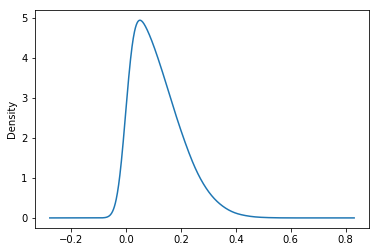

In [657]:
standard_similarity["similarity"].plot.kde(bw_method=0.3)

In [658]:
#Format required of the matrix to run clustering Measures
#!mkdir result/measures
cosine_matrix.to_csv(output+'measures/matrix_undirected_cosine.txt', mode='w+',
                     index=False, header=False, float_format='%.5f')
with open(output+'measures/'+ENTITIES_FILE, "w") as entity:
    entity.write(n_ent+"\n"+entities)

In [ ]:
#Run clustering Measures from: https://github.com/SDM-TIB/korona-graph-partitioning/tree/master/utils/clusteringMeasures
#!rivas@LXZ15265:/media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/korona-graph-partitioning/utils/clusteringMeasures$ ./cma measures/clusters measures/entities.txt measures/matrix_undirected_cosine.txt

In [663]:
path = '../korona-graph-partitioning/utils/clusteringMeasures/'
cls_m = path + "output.txt"
measure = []
static = 16
n_metric = 5
cls_measures = pd.read_csv(cls_m, delimiter=",", header=None)
index_start = static + num_cls
index_end = index_start + n_metric
for pos in range(index_start, index_end):
    a = cls_measures.iloc[pos].to_string()
    b = a.split('\\t')[1]
    measure.append(float(b))
print(*[measure[0],measure[4], measure[3], measure[2], measure[1]], sep='\n')

0.728530601561
0.831316132381
1051.329160000002
0.145543205647
0.292821137659


In [664]:
#Transform these three metric to (Inv. Conductance, Norm.Modularity and Inv.Norm.Total Cut) for each algorithm

#conductance = 0.705256059271
#modularity = 0.166783425861
#total_cut = 1012.587679999999
#max_cut = sum(list_sim)

max_cut = sum(cosine_matrix.sum(axis = 0, skipna = True))

measure[0] = 1.0 - measure[0]
measure[2] = (measure[2] + 0.5)/1.5
measure[3] = 1-(measure[3]/max_cut)
print(*[round(measure[0],3) ,round(measure[4],3), round(measure[3],3), round(measure[2],3), round(measure[1],3)], sep='\n')

0.271
0.831
0.681
0.43
0.293


### Cluster evaluation in terms of prediction metrics (hasClassification)

In [406]:
# Set data

cls_evaluation_TransD_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.443, 0.588, 0.574],
'Inv. Performance': [0.462, 0.511, 0.507],
'Inv. Norm.Total Cut': [0.825, 0.816, 0.817],
'Norm.Modularity': [0.380, 0.401, 0.402],
'Coverage': [0.621, 0.602, 0.605]
})

cls_evaluation_TransE_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.373, 0.483, 0.380],
'Inv. Performance': [0.551, 0.663, 0.420],
'Inv. Norm.Total Cut': [0.778, 0.761, 0.837],
'Norm.Modularity': [0.386, 0.433, 0.403],
'Coverage': [0.521, 0.485, 0.648]
})

cls_evaluation_TransH_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.228, 0.308, 0.300],
'Inv. Performance': [0.828, 0.851, 0.763],
'Inv. Norm.Total Cut': [0.641, 0.683, 0.686],
'Norm.Modularity': [0.399, 0.461, 0.454],
'Coverage': [0.238, 0.326, 0.332]
})

cls_evaluation_TransR_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.413, 0.583, 0.458],
'Inv. Performance': [0.449, 0.511, 0.453],
'Inv. Norm.Total Cut': [0.826, 0.815, 0.838],
'Norm.Modularity': [0.373, 0.401, 0.392],
'Coverage': [0.624, 0.602, 0.651]
})
#==========================================================================
cls_evaluation_TransD_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.214, 0.314, 0.282],
'Inv. Performance': [0.832, 0.841, 0.805],
'Inv. Norm.Total Cut': [0.647, 0.691, 0.689],
'Norm.Modularity': [0.380, 0.447, 0.423],
'Coverage': [0.216, 0.314, 0.310]
})

cls_evaluation_TransE_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.194, 0.288, 0.278],
'Inv. Performance': [0.858, 0.872, 0.804],
'Inv. Norm.Total Cut': [0.640, 0.681, 0.690],
'Norm.Modularity': [0.389, 0.454, 0.437],
'Coverage': [0.203, 0.295, 0.314]
})

cls_evaluation_TransH_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.197, 0.218, 0.207],
'Inv. Performance': [0.908, 0.921, 0.823],
'Inv. Norm.Total Cut': [0.647, 0.646, 0.667],
'Norm.Modularity': [0.431, 0.444, 0.451],
'Coverage': [0.232, 0.229, 0.275]
})

cls_evaluation_TransR_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.193, 0.293, 0.271],
'Inv. Performance': [0.842, 0.858, 0.831],
'Inv. Norm.Total Cut': [0.637, 0.681, 0.681],
'Norm.Modularity': [0.376, 0.445, 0.43],
'Coverage': [0.196, 0.293, 0.293]
})
#======================================================================
cls_evaluation_TransD_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.138, 0.225, 0.187],
'Inv. Performance': [0.955, 0.961, 0.932],
'Inv. Norm.Total Cut': [0.644, 0.678, 0.667],
'Norm.Modularity': [0.408, 0.463, 0.435],
'Coverage': [0.145, 0.226, 0.201]
})

cls_evaluation_TransE_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.132, 0.124, 0.197],
'Inv. Performance': [0.957, 0.958, 0.958],
'Inv. Norm.Total Cut': [0.635, 0.635, 0.665],
'Norm.Modularity': [0.397, 0.399, 0.446],
'Coverage': [0.127, 0.127, 0.201]
})

cls_evaluation_TransH_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.284, 0.093, 0.167],
'Inv. Performance': [0.954, 0.959, 0.804],
'Inv. Norm.Total Cut': [0.689, 0.607, 0.696],
'Norm.Modularity': [0.474, 0.373, 0.468],
'Coverage': [0.277, 0.088, 0.293]
})

cls_evaluation_TransR_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.140, 0.084, 0.189],
'Inv. Performance': [0.957, 0.956, 0.950],
'Inv. Norm.Total Cut': [0.643, 0.617, 0.664],
'Norm.Modularity': [0.409, 0.369, 0.440],
'Coverage': [0.146, 0.084, 0.196]
})

### Cluster evaluation in terms of prediction metrics (relatedTo)

In [406]:
# Set data

cls_evaluation_TransD_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.415, 0.592, 0.413],
'Inv. Performance': [0.451, 0.512, 0.404],
'Inv. Norm.Total Cut': [0.824, 0.817, 0.853],
'Norm.Modularity': [0.372, 0.403, 0.385],
'Coverage': [0.620, 0.605, 0.682]
})

cls_evaluation_TransE_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.553, 0.595, 0.349],
'Inv. Performance': [0.505, 0.513, 0.267],
'Inv. Norm.Total Cut': [0.806, 0.821, 0.902],
'Norm.Modularity': [0.387, 0.409, 0.374],
'Coverage': [0.583, 0.615, 0.790]
})

cls_evaluation_TransH_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.277, 0.333, 0.329],
'Inv. Performance': [0.805, 0.836, 0.709],
'Inv. Norm.Total Cut': [0.670, 0.694, 0.694],
'Norm.Modularity': [0.417, 0.465, 0.447],
'Coverage': [0.297, 0.350, 0.350]
})

cls_evaluation_TransR_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.42, 0.585, 0.502],
'Inv. Performance': [0.459, 0.511, 0.477],
'Inv. Norm.Total Cut': [0.823, 0.816, 0.826],
'Norm.Modularity': [0.373, 0.402, 0.397],
'Coverage': [0.619, 0.603, 0.626]
})
#==========================================================================
cls_evaluation_TransD_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.219, 0.311, 0.282],
'Inv. Performance': [0.831, 0.841, 0.745],
'Inv. Norm.Total Cut': [0.649, 0.690, 0.714],
'Norm.Modularity': [0.383, 0.446, 0.417],
'Coverage': [0.221, 0.312, 0.365]
})

cls_evaluation_TransE_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.201, 0.275, 0.280],
'Inv. Performance': [0.862, 0.870, 0.820],
'Inv. Norm.Total Cut': [0.640, 0.674, 0.687],
'Norm.Modularity': [0.394, 0.444, 0.437],
'Coverage': [0.204, 0.278, 0.307]
})

cls_evaluation_TransH_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.176, 0.211, 0.194],
'Inv. Performance': [0.909, 0.921, 0.833],
'Inv. Norm.Total Cut': [0.639, 0.642, 0.667],
'Norm.Modularity': [0.422, 0.439, 0.456],
'Coverage': [0.214, 0.220, 0.275]
})

cls_evaluation_TransR_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.212, 0.318, 0.282],
'Inv. Performance': [0.832, 0.842, 0.797],
'Inv. Norm.Total Cut': [0.645, 0.693, 0.691],
'Norm.Modularity': [0.379, 0.450, 0.424],
'Coverage': [0.213, 0.319, 0.315]
})
#======================================================================
cls_evaluation_TransD_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.138, 0.225, 0.187],
'Inv. Performance': [0.955, 0.961, 0.932],
'Inv. Norm.Total Cut': [0.644, 0.678, 0.667],
'Norm.Modularity': [0.408, 0.463, 0.435],
'Coverage': [0.145, 0.226, 0.201]
})

cls_evaluation_TransE_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.132, 0.124, 0.197],
'Inv. Performance': [0.957, 0.958, 0.958],
'Inv. Norm.Total Cut': [0.635, 0.635, 0.665],
'Norm.Modularity': [0.397, 0.399, 0.446],
'Coverage': [0.127, 0.127, 0.201]
})

cls_evaluation_TransH_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.284, 0.093, 0.167],
'Inv. Performance': [0.954, 0.959, 0.804],
'Inv. Norm.Total Cut': [0.689, 0.607, 0.696],
'Norm.Modularity': [0.474, 0.373, 0.468],
'Coverage': [0.277, 0.088, 0.293]
})

cls_evaluation_TransR_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.140, 0.084, 0.189],
'Inv. Performance': [0.957, 0.956, 0.950],
'Inv. Norm.Total Cut': [0.643, 0.617, 0.664],
'Norm.Modularity': [0.409, 0.369, 0.440],
'Coverage': [0.146, 0.084, 0.196]
})

## Evaluation in term of threshold

In [422]:
# Set data

cls_evaluation_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.486, 0.595, 0.584],
'Inv. Performance': [0.483, 0.511, 0.510],
'Inv. Norm.Total Cut': [0.814, 0.816, 0.815],
'Norm.Modularity': [0.383, 0.402, 0.400],
'Coverage': [0.598, 0.603, 0.601]
})

cls_evaluation_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.212, 0.312, 0.283],
'Inv. Performance': [0.830, 0.841, 0.747],
'Inv. Norm.Total Cut': [0.647, 0.691, 0.714],
'Norm.Modularity': [0.379, 0.447, 0.421],
'Coverage': [0.217, 0.313, 0.366]
})

cls_evaluation_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.128, 0.223, 0.190],
'Inv. Performance': [0.954, 0.961, 0.951],
'Inv. Norm.Total Cut': [0.642, 0.677, 0.665],
'Norm.Modularity': [0.403, 0.462, 0.439],
'Coverage': [0.139, 0.224, 0.195]
})

In [432]:
def radar_plot(nrows, ncols, index, df):
    # Libraries
    import matplotlib.pyplot as plt
    from math import pi

    # ------- PART 1: Create background

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(nrows, ncols, index, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    #plt.xticks(angles[:-1], categories, fontsize=7, rotation=40)
    plt.xticks(angles[:-1], categories, fontsize=7, rotation=40)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9], ['0','0.2', '0.3','0.4', '0.5', '0.6', '0.7', '0.9'],
               color="grey", size=2.5)
    plt.ylim(0,1.0)

    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Algorithm3
    values=df.loc[2].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Kmeans")
    ax.fill(angles, values, 'r', alpha=0.1)

    # Algorithm2
    values=df.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Metis")
    ax.fill(angles, values, 'r', alpha=0.1)
    
    # Algorithm1
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="SemEP")
    ax.fill(angles, values, 'r', alpha=0.1)
    

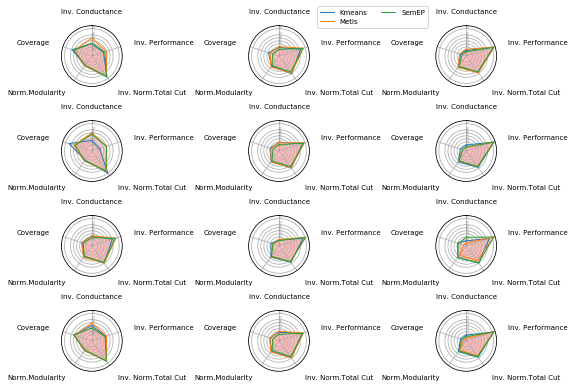

In [433]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# plot with various axes scales
plt.figure(1) #figsize=(20, 10)

# TransD
radar_plot(4, 3, 1,cls_evaluation_TransD_th_85)
#plt.title('TransD - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransD
radar_plot(4, 3, 2,cls_evaluation_TransD_th_90)
#plt.title('TransD - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransD
radar_plot(4, 3, 3,cls_evaluation_TransD_th_95)
#plt.title('TransD - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# TransE
radar_plot(4, 3, 4,cls_evaluation_TransE_th_85)
#plt.title('TransE - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransE
radar_plot(4, 3, 5,cls_evaluation_TransE_th_90)
#plt.title('TransE - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransE
radar_plot(4, 3, 6,cls_evaluation_TransE_th_95)
#plt.title('TransE - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# TransH
radar_plot(4, 3, 7,cls_evaluation_TransH_th_85)
#plt.title('TransH - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransH
radar_plot(4, 3, 8,cls_evaluation_TransH_th_90)
#plt.title('TransH - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransH
radar_plot(4, 3, 9,cls_evaluation_TransH_th_95)
#plt.title('TransH - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# TransR
radar_plot(4,3,10,cls_evaluation_TransR_th_85)
#plt.title('TransR - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransR
radar_plot(4,3,11,cls_evaluation_TransR_th_90)
#plt.title('TransR - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransR
radar_plot(4,3,12,cls_evaluation_TransR_th_95)
#plt.title('TransR - Threshold:0.95', y=1.2, fontsize=8, weight='bold')


# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=1.2, bottom=0.0, left=0.0, right=1.3, hspace=0.56,
                    wspace=0)
plt.legend(loc = (-1.95, 5.65), ncol=2, fontsize=7)

plt.savefig("Measure of standards clusters based on Trans Family.pdf", format='pdf', bbox_inches = 'tight')
#plt.show()

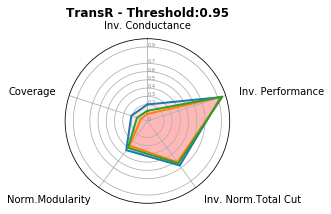

In [911]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# plot with various axes scales
plt.figure(1) #figsize=(20, 10)

# TransD
radar_plot(2,2,1,cls_evaluation_TransR_th_95)
plt.title('TransR - Threshold:0.95', y=1.1, fontsize=12, weight='bold')


plt.subplots_adjust(top=1.2, bottom=0.0, left=0.0, right=1.3, hspace=0.10,
                    wspace=0.1)
#plt.legend(loc = (-0.5, 0.9), ncol=1, fontsize='medium')


plt.savefig("TransR-Threshold:0.95.pdf", format='pdf', bbox_inches = 'tight')
#plt.show()